<a href="https://colab.research.google.com/github/Swiya-Jaiswal/TSF_Task_2_PCA/blob/main/TSF_Task_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task: Prediction using Unsupervised ML**

*Author: Swiya Jaiswal*

**Principal Component Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Load the dataset

In [2]:
iris = load_iris()
df=pd.DataFrame(data=iris.data, columns =["sepal_length", "sepal_width", "petal_length", "petal_width"])
df['species']= iris.target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Seperate the input features and the class variables

In [3]:
x= df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y=df[["species"]]

In [4]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


Correlation heatmap

In [6]:
import seaborn as sns

<Axes: >

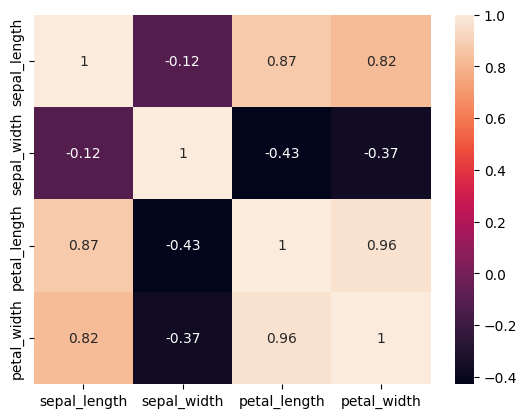

In [7]:
sns.heatmap(x.corr(), annot = True)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
import numpy as np
features = x_scaled.T
covariance_matrix= np.cov(features)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [10]:
values, vectors = np.linalg.eig(covariance_matrix)

In [11]:
values.shape

(4,)

In [12]:
vectors.shape

(4, 4)

In [13]:
vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [14]:
values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [15]:
percentage_variance = []
for i in range(len(values)):
  percentage_variance.append(values[i]/np.sum(values))
percentage_variance


[0.7296244541329989,
 0.22850761786701754,
 0.03668921889282865,
 0.005178709107154905]

In [16]:
projected_1 = x_scaled.dot(vectors.T[0])
projected_2 = x_scaled.dot(vectors.T[1])
result = pd.DataFrame(projected_1, columns = ['PC1'])
result['PC2']= projected_2
result['species']= y
result

,PC1,PC2,species
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0
...,...,...,...
145,1.870503,-0.386966,2
146,1.564580,0.896687,2
147,1.521170,-0.269069,2
148,1.372788,-1.011254,2


<Axes: >

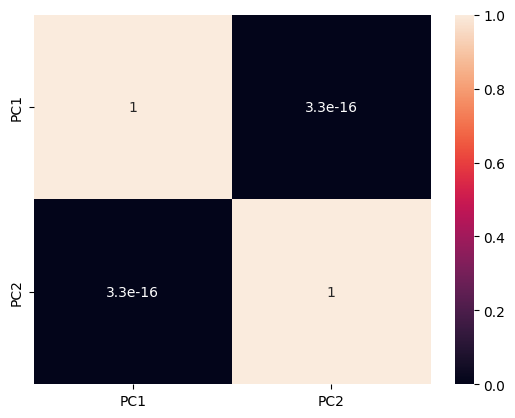

In [17]:
x = result[['PC1', 'PC2']]
sns.heatmap(x.corr(), annot = True)

<Axes: xlabel='PC1', ylabel='PC2'>

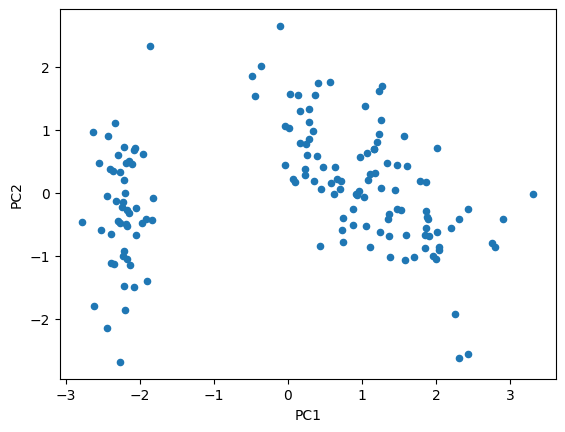

In [18]:
result.plot(kind = "scatter", x ='PC1', y ='PC2')